In [98]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive plots
#import cufflinks as cf
#from IPython.display import display, HTML
#cf.set_config_file(sharing='public', offline=True) # Set cufflinks attributes

In [99]:
# """ Initialize plots properties """
# # Set plot style
# plt.style.use('default')

# # Set plot properties
# plt.rcParams['figure.figsize'] = (8, 6)
# plt.rcParams['font.size'] = 12
# plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['axes.titlesize'] = 12
# plt.rcParams['axes.titleweight'] = 'bold'
# plt.rcParams['axes.labelpad'] = 14
# plt.rcParams['axes.titlepad'] = 14

In [100]:
credit = pd.read_csv("credit_risk_dataset.csv") #-- Read dataset for analysis
credit.sample(10) #-- Show 10 random rows in the dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28186,30,81120,OWN,3.0,PERSONAL,B,18000,10.75,0,0.22,N,5
30025,47,244000,RENT,10.0,HOMEIMPROVEMENT,C,9000,13.61,0,0.04,N,11
1914,24,53117,RENT,1.0,PERSONAL,C,2000,13.79,0,0.04,N,2
19050,29,80004,RENT,12.0,PERSONAL,B,2000,9.76,0,0.02,N,10
15021,23,120000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,4900,7.14,0,0.04,N,4
30338,37,52000,MORTGAGE,1.0,VENTURE,A,15000,NaN,0,0.29,N,14
15729,22,160000,OWN,6.0,VENTURE,A,7000,8.90,0,0.04,N,3
24977,30,79000,MORTGAGE,3.0,HOMEIMPROVEMENT,A,6000,9.63,0,0.08,N,8
15236,22,125004,MORTGAGE,6.0,EDUCATION,A,30000,7.90,0,0.24,N,2
2810,22,34800,MORTGAGE,3.0,DEBTCONSOLIDATION,C,1500,13.49,0,0.04,Y,3


In [101]:
# General overview of the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [102]:
# Displays statistical information about the numerical columns
credit.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [103]:
# Get number of unique values in each columns
credit.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [104]:
# Get list of data columns
credit_columns = credit.columns

""" Group numerical and categorical data type"""
numerical_columns = credit.select_dtypes(include=["int","float"]) #For numerical data types
categorical_columns = credit.select_dtypes(include="object") #For categorical data types

In [105]:
credit['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [106]:
credit['loan_intent'] = credit['loan_intent'].str.replace('DEBTCONSOLIDATION','Debt Consolidation').str.replace('HOMEIMPROVEMENT','Home Improvement')
credit['loan_intent'].value_counts()

loan_intent
EDUCATION             6453
MEDICAL               6071
VENTURE               5719
PERSONAL              5521
Debt Consolidation    5212
Home Improvement      3605
Name: count, dtype: int64

In [107]:
# Standardized values in the object columns to title case
for column in cat_columns:
    credit[column] = credit[column].str.strip().str.title()

In [108]:
# Checks for null values
credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [109]:
""" Fill missing values in the order of Mode (categorical data) and Mean (Numerical data) """

#Fill categorical data
for column in categorical_columns:
    if credit[column].isnull().sum() > 0:
        credit[column] = credit[column].fillna(credit[column].mode())
        
# Fill numerical data
for column in numerical_columns:
    if credit[column].isnull().sum() > 0:
        credit[column] = credit[column].fillna(credit[column].mean())

In [110]:
# Check if null value still exists
credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [111]:
"""Classify person into age groups"""

# Labels for each group
age_label = ['20-30','31-50','51-69','70+'] 

# create group and add to daataset as a new column
credit['age_group'] = pd.cut(credit['person_age'],bins=4, labels=age_label, right=True, include_lowest=True)

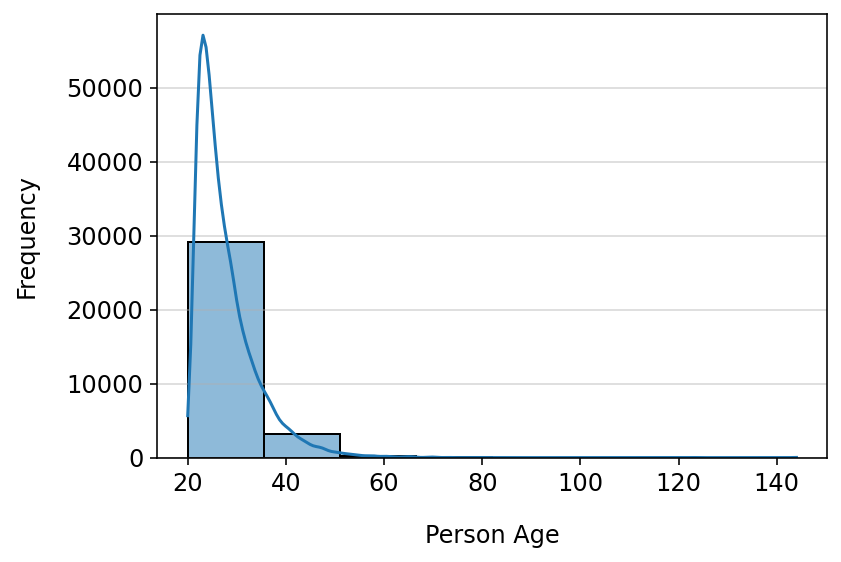

In [ ]:
# Plot the age distribution in the dataset
fig, ax = plt.subplots(figsize=(6,4), dpi=144)
sns.histplot(data=credit,x='person_age', bins= 8 ,kde=True)
plt.grid(alpha=0.5, axis='y')
ax.set_xlabel('Person Age')
ax.set_ylabel('Frequency')
plt.show()

In [113]:
# sns.countplot(data=credit,x="loan_status", hue="loan_status",legend=True)
# plt.xlabel("Loan Status")
# plt.grid(axis="y", alpha=0.2)